<a href="https://colab.research.google.com/github/Alex-cyber-svg/ml-dl_special/blob/main/Data%20Mining/%E2%84%9610/(Data_Mining)_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №10. Анализ и сегментация клиентов с помощью алгоритмов кластеризации**

### **Цель работы:**

Разработать систему сегментации клиентов для розничной компании с использованием алгоритмов кластеризации. Это позволит компании лучше понимать своих клиентов, персонализировать маркетинговые кампании и оптимизировать бизнес-процессы.

### **Введение:**

Розничные компании сталкиваются с большим объемом данных о своих клиентах, включая историю покупок, демографическую информацию и поведенческие характеристики. Однако без должного анализа эти данные остаются неиспользованными. Сегментация клиентов позволяет выделить группы с общими характеристиками, чтобы более эффективно таргетировать предложения и улучшить удовлетворенность клиентов.



### **Задачи:**

1. **Сбор и анализ данных о клиентах.**
2. **Предобработка и подготовка данных для моделирования.**
3. **Применение различных алгоритмов кластеризации для сегментации клиентов.**
4. **Оценка качества кластеризации с использованием внутренних и внешних метрик.**
5. **Интерпретация и визуализация результатов.**
6. **Формирование рекомендаций для бизнес-стратегии компании на основе полученных сегментов.**



### **Пошаговое описание рабочего процесса (пайплайна):**

#### **Шаг 1: Сбор и анализ данных**

**1.1. Выбор набора данных:**

- Используйте датасет "Online Retail II" из [UCI Machine Learning Repository](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci) или другой открытый набор данных, содержащий информацию о транзакциях клиентов.
- Данные должны включать:
  - Идентификаторы клиентов.
  - Информацию о покупках (товары, количество, стоимость).
  - Дату и время транзакций.
  - Демографические данные (если доступны): возраст, пол, локация и т.д.

**1.2. Первичный анализ данных (EDA):**

- Изучите структуру данных и их распределение.
- Определите основные характеристики данных:
  - Общий объем продаж.
  - Частота покупок по клиентам.
  - Распределение выручки по товарам.
- Выявите тенденции и аномалии.

In [ ]:
!curl -L -o /content/bank-transactions.zip\
  https://www.kaggle.com/api/v1/datasets/download/valakhorasani/bank-transaction-dataset-for-fraud-detection
!unzip -qq bank-transactions.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  102k  100  102k    0     0   125k      0 --:--:-- --:--:-- --:--:-- 1360k


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("bank_transactions_data_2.csv")
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

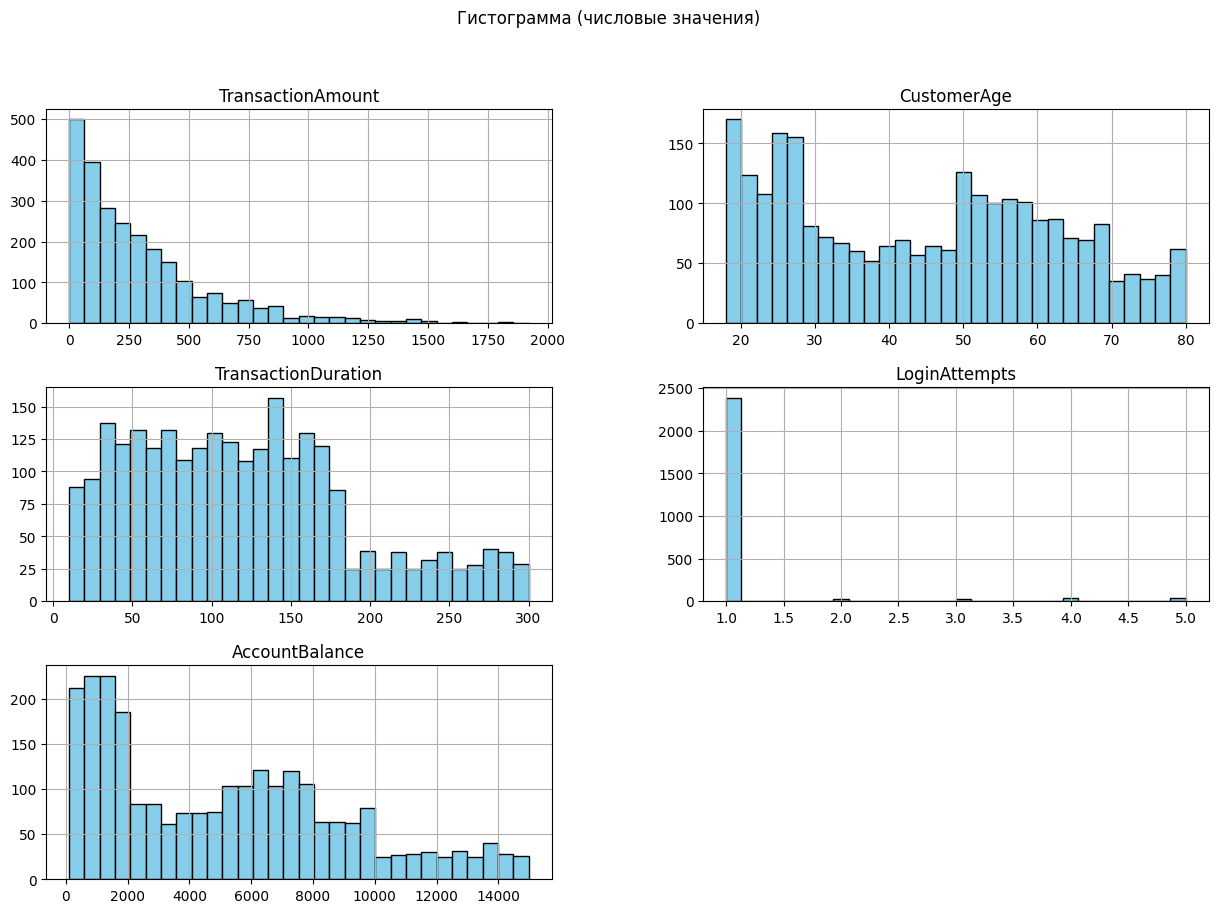

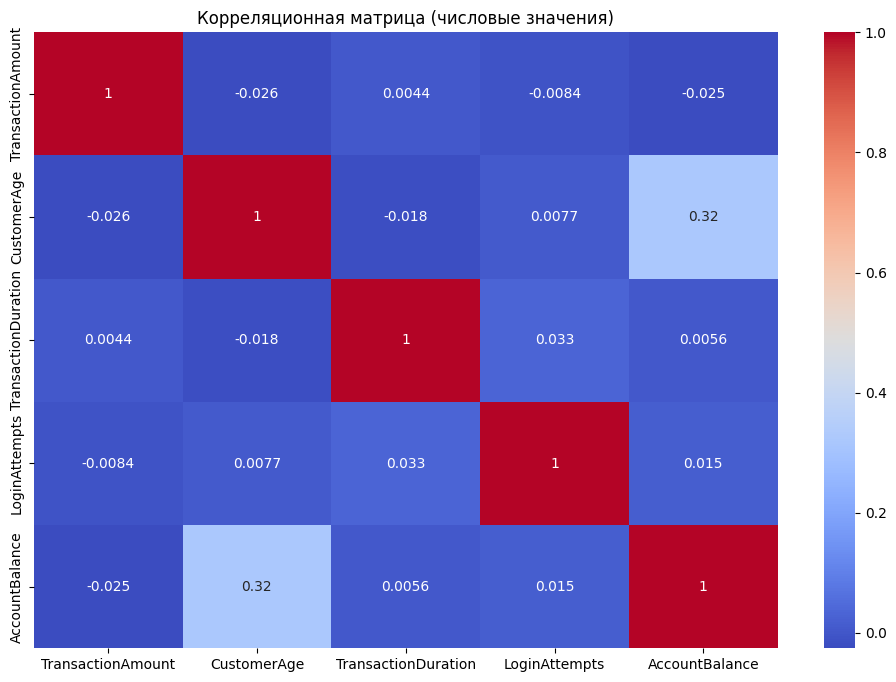

In [ ]:
# Гистограмма
data.hist(figsize=(15, 10), bins=30, edgecolor='black', color='skyblue')
plt.suptitle('Гистограмма (числовые значения)')
plt.show()
print()

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Корреляция
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица (числовые значения)')
plt.show()

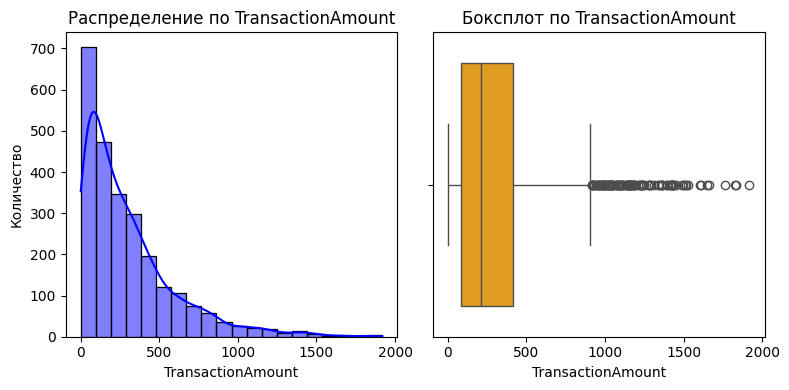

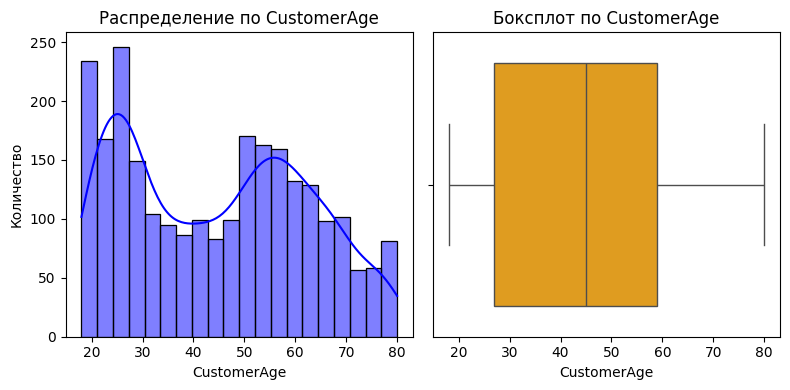

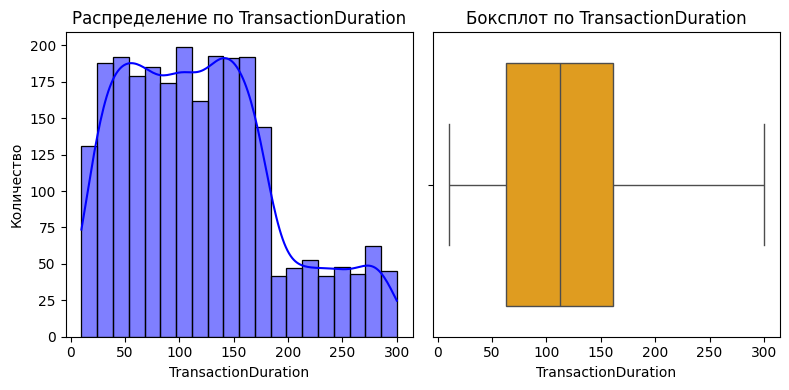

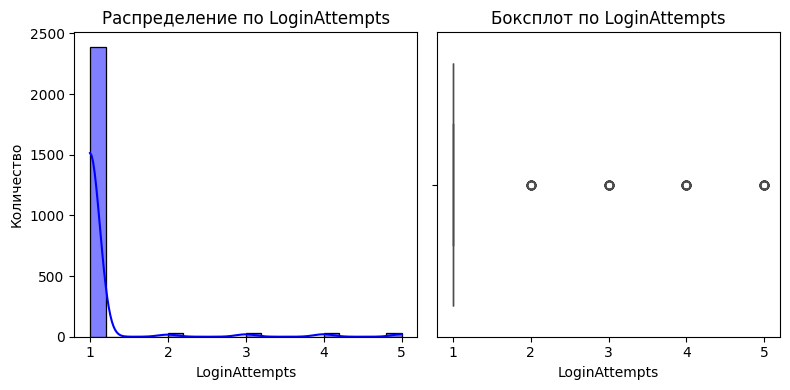

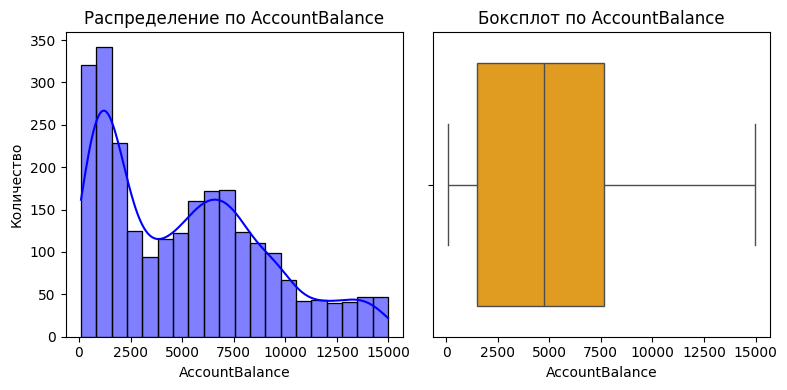

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Распределение по {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Боксплот по {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

<ipython-input-24-1cb2cf27fd90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Location'], order=data['Location'].value_counts().index, palette='viridis')


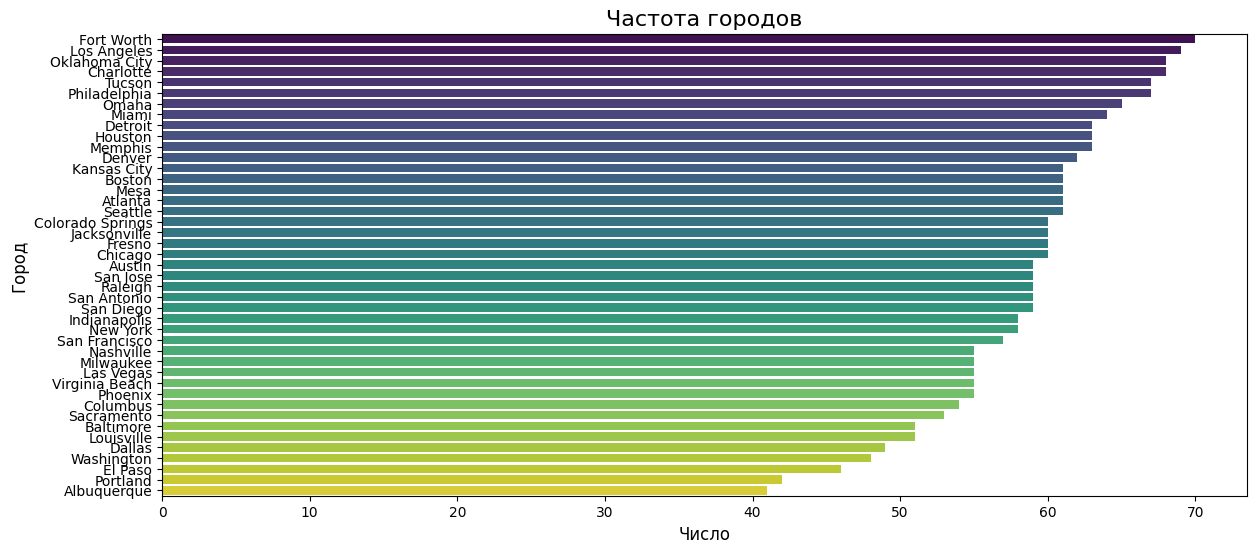

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(y=data['Location'], order=data['Location'].value_counts().index, palette='viridis')
plt.title('Частота городов', fontsize=16)
plt.xlabel('Число', fontsize=12)
plt.ylabel('Город', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-10-fbd2ccd26ee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[data['AccountID'].isin(top_10_acc)]['AccountID'], order=top_10_acc, palette='cool')


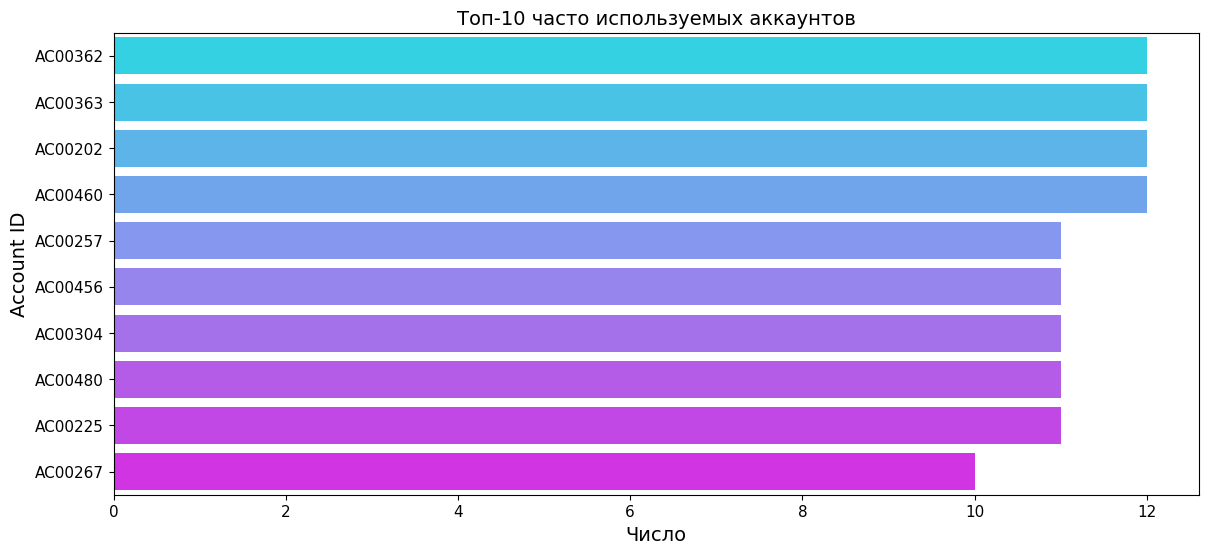

In [ ]:
top_10_acc = data['AccountID'].value_counts().head(10).index
plt.figure(figsize=(14, 6))
sns.countplot(y=data[data['AccountID'].isin(top_10_acc)]['AccountID'], order=top_10_acc, palette='cool')
plt.title('Топ-10 часто используемых аккаунтов', fontsize=14)
plt.xlabel('Число', fontsize=14)
plt.ylabel('Account ID', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

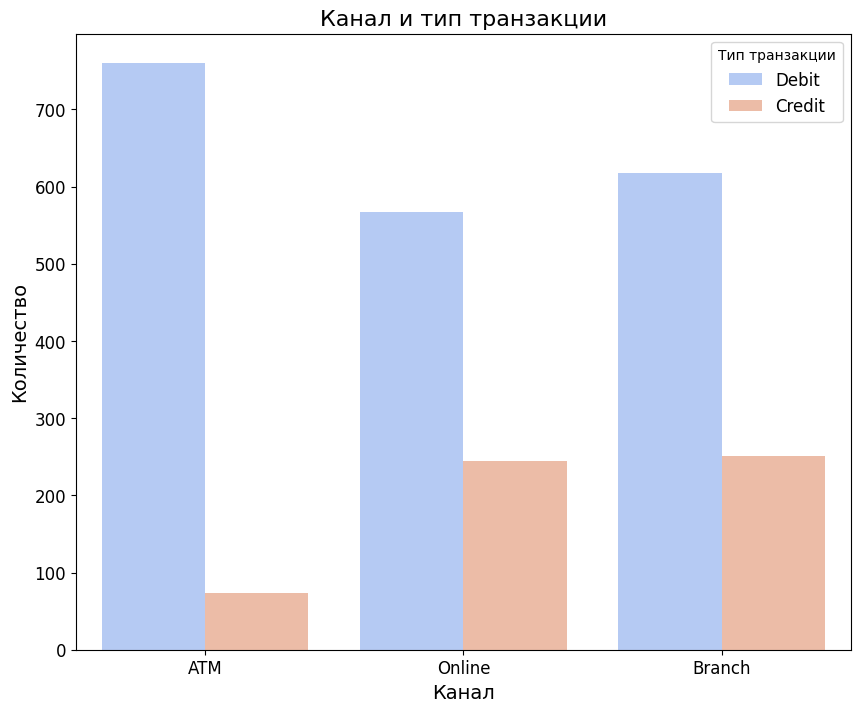

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Channel', hue='TransactionType', data=data, palette='coolwarm')
plt.title('Канал и тип транзакции', fontsize=16)
plt.xlabel('Канал', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Тип транзакции', fontsize=12)
plt.show()

<ipython-input-31-45d9ad29e9ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerOccupation', y='CustomerAge', data=data, estimator='mean', palette='muted', errorbar=None)


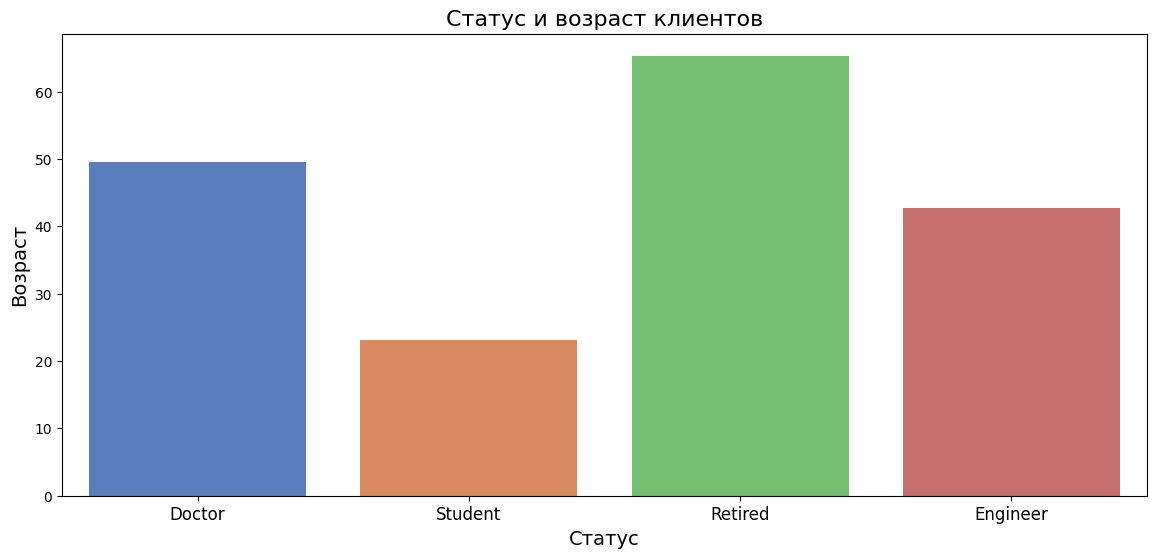

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='CustomerOccupation', y='CustomerAge', data=data, estimator='mean', palette='muted', errorbar=None)
plt.title('Статус и возраст клиентов', fontsize=16)
plt.xlabel('Статус', fontsize=14)
plt.ylabel('Возраст', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

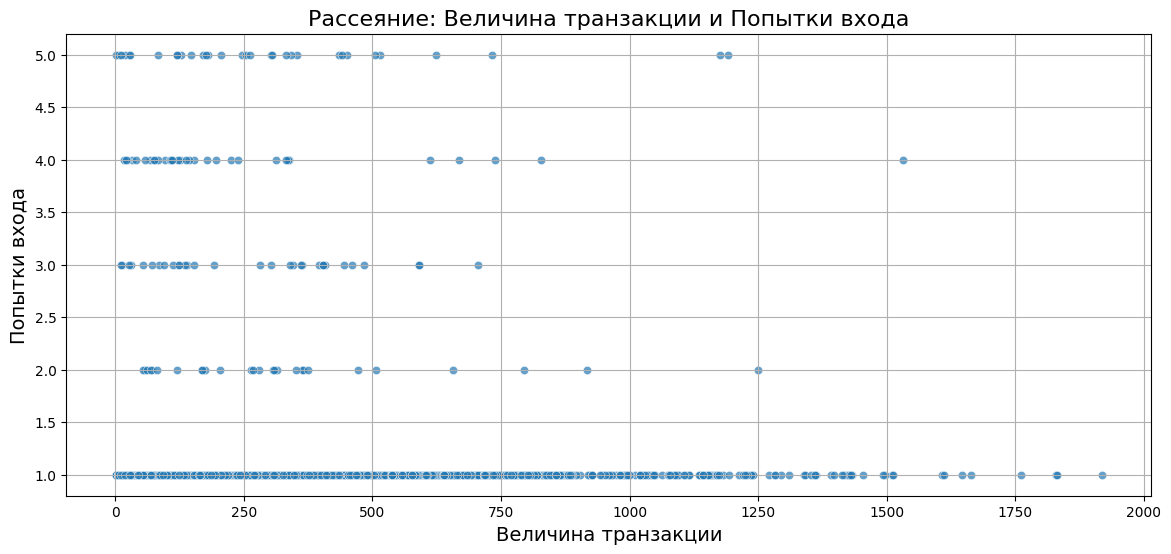

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['TransactionAmount'], y=data['LoginAttempts'], alpha=0.7)
plt.title(f'Рассеяние: Величина транзакции и Попытки входа', fontsize=16)
plt.xlabel('Величина транзакции', fontsize=14)
plt.ylabel('Попытки входа', fontsize=14)
plt.grid(True)
plt.show()

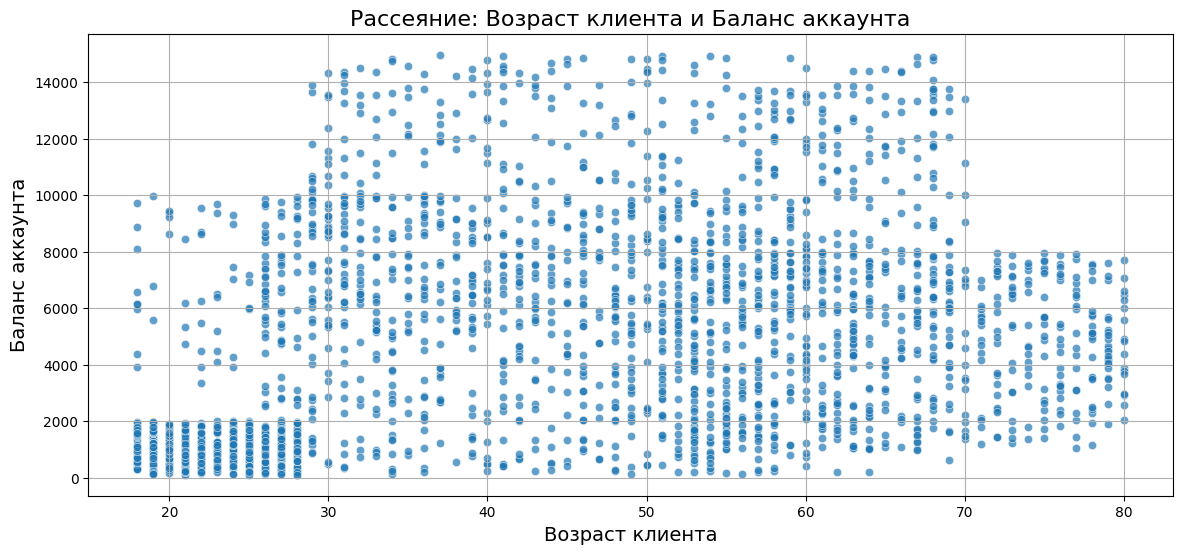

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['CustomerAge'], y=data['AccountBalance'], alpha=0.7)
plt.title(f'Рассеяние: Возраст клиента и Баланс аккаунта', fontsize=16)
plt.xlabel('Возраст клиента', fontsize=14)
plt.ylabel('Баланс аккаунта', fontsize=14)
plt.grid(True)
plt.show()

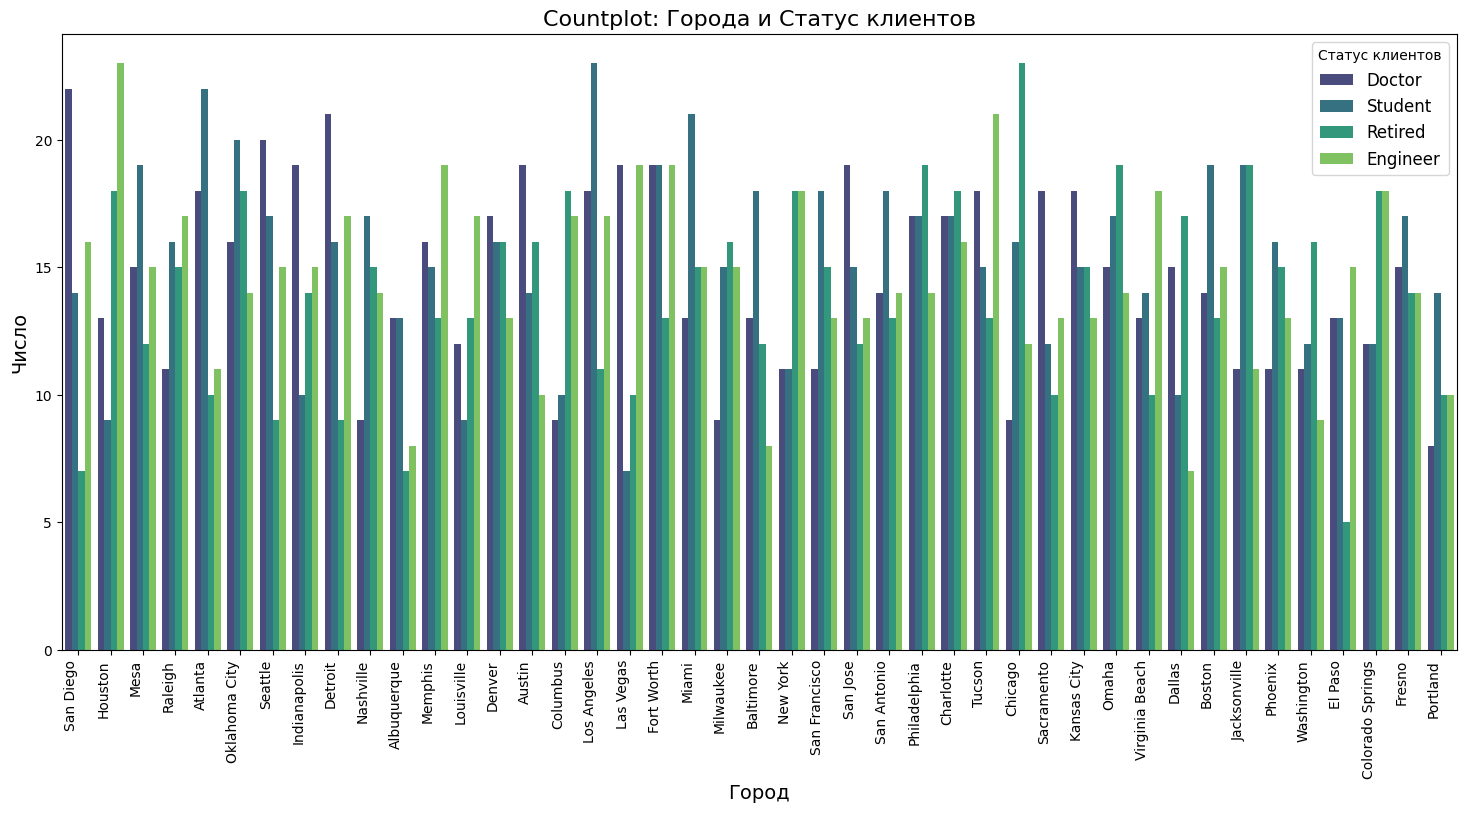

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x=data['Location'], hue=data['CustomerOccupation'], data=data, palette='viridis')
plt.title('Countplot: Города и Статус клиентов', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Число', fontsize=14)
plt.xticks(rotation=90, fontsize=10, ha='right')
plt.legend(title='Статус клиентов', fontsize=12)
plt.show()

#### **Шаг 2: Предобработка данных**

**2.1. Работа с пропущенными значениями:**

- Проанализируйте наличие пропущенных данных.
- Решите, как справиться с ними:
  - Удаление строк/столбцов с пропущенными значениями.
  - Заполнение пропущенных значений средним, медианой или наиболее частым значением.

**2.2. Обработка выбросов:**

- Выявите выбросы в данных (например, аномально большие заказы).
- Решите, следует ли их удалить или обработать иным образом.

**2.3. Создание новых признаков:**

- Рассчитайте Recency, Frequency, Monetary Value (RFM-анализ):
  - **Recency (давность):** Время с момента последней покупки.
  - **Frequency (частота):** Количество покупок за определенный период.
  - **Monetary (сумма):** Общая сумма покупок.
- Создайте дополнительные признаки, такие как средний чек, предпочтительные категории товаров и т.д.

**2.4. Нормализация и масштабирование:**

- Примените стандартизацию или нормализацию к числовым признакам для приведения их к единому масштабу.
- Объясните выбор метода масштабирования.

In [ ]:
data.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
from datetime import datetime

data['TransactionDate'] = pd.to_datetime(data['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['Recency'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds() # Время с последней транзакции

data['Frequency'] = data.groupby('AccountID')['TransactionID'].transform('count') # Частота транзакций с аккаунта

data['Monetary'] = data.groupby('AccountID')['TransactionAmount'].transform('sum') # Общая сумма транзакции с аккаунта

In [ ]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Recency,Frequency,Monetary
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,-49477134.0,7,3224.89
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,-42823516.0,7,2132.36
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,-41694656.0,4,948.19
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,-47403415.0,8,1891.87
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,-33228915.0,6,1684.78


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Identify numeric and categorical columns
num_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts',
            'AccountBalance', 'CustomerAge', 'Recency', 'Frequency', 'Monetary']
category_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Normalize numeric columns
scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)

# One-hot encode categorical columns
encoder = OrdinalEncoder()
# encoder = OneHotEncoder(sparse_output=False, drop='first') # Avoid dummy variable trap
category_encoded = pd.DataFrame(encoder.fit_transform(data[category_cols]),
                                columns=encoder.get_feature_names_out(category_cols))

# Combine preprocessed data
processed_data = pd.concat([num_scaled, category_encoded], axis=1)

processed_data.head()

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge,Recency,Frequency,Monetary,TransactionType,Location,Channel,CustomerOccupation
0,-0.971275,-0.552443,-0.206794,-0.000537,1.423718,-0.800762,0.394950,1.420057,1.0,36.0,0.0,0.0
1,0.269440,0.305314,-0.206794,2.216472,1.311287,-0.076706,0.394950,0.310470,1.0,15.0,0.0,0.0
2,-0.586882,-0.909842,-0.206794,-1.023534,-1.443277,0.046138,-0.936152,-0.892188,1.0,23.0,2.0,3.0
3,-0.387456,-1.353017,-0.206794,0.885797,-1.049768,-0.575097,0.838651,0.066225,1.0,33.0,2.0,3.0
4,-0.973468,1.120184,-0.206794,0.593589,-1.049768,0.967391,-0.048751,-0.144098,0.0,1.0,2.0,3.0


In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionDuration  2512 non-null   float64
 2   LoginAttempts        2512 non-null   float64
 3   AccountBalance       2512 non-null   float64
 4   CustomerAge          2512 non-null   float64
 5   Frequency            2512 non-null   float64
 6   Monetary             2512 non-null   float64
 7   TransactionType      2512 non-null   float64
 8   Location             2512 non-null   float64
 9   Channel              2512 non-null   float64
 10  CustomerOccupation   2512 non-null   float64
dtypes: float64(11)
memory usage: 216.0 KB


#### **Шаг 3: Применение алгоритмов кластеризации**

**3.1. Выбор алгоритмов:**

- **K-средних (K-Means):** Для разбиения данных на k кластеров на основе эврестического подхода.
- **Иерархическая кластеризация:** Для выявления вложенной структуры кластеров.
- **DBSCAN и OPTICS:** Для обнаружения кластеров произвольной формы и выявления выбросов.

**3.2. Определение оптимального количества кластеров:**

- Для K-Means и иерархической кластеризации используйте:
  - **Метод локтя (Elbow Method):** Постройте график зависимости суммы квадратов внутрикластерных расстояний от числа кластеров.
  - **Коэффициент силуэта:** Рассчитайте для различных значений k и выберите оптимальное.

**3.3. Применение алгоритмов:**

- Запустите каждый алгоритм на подготовленных данных.
- Сохраняйте результаты кластеризации для последующего анализа.

##### Определение числа кластеров

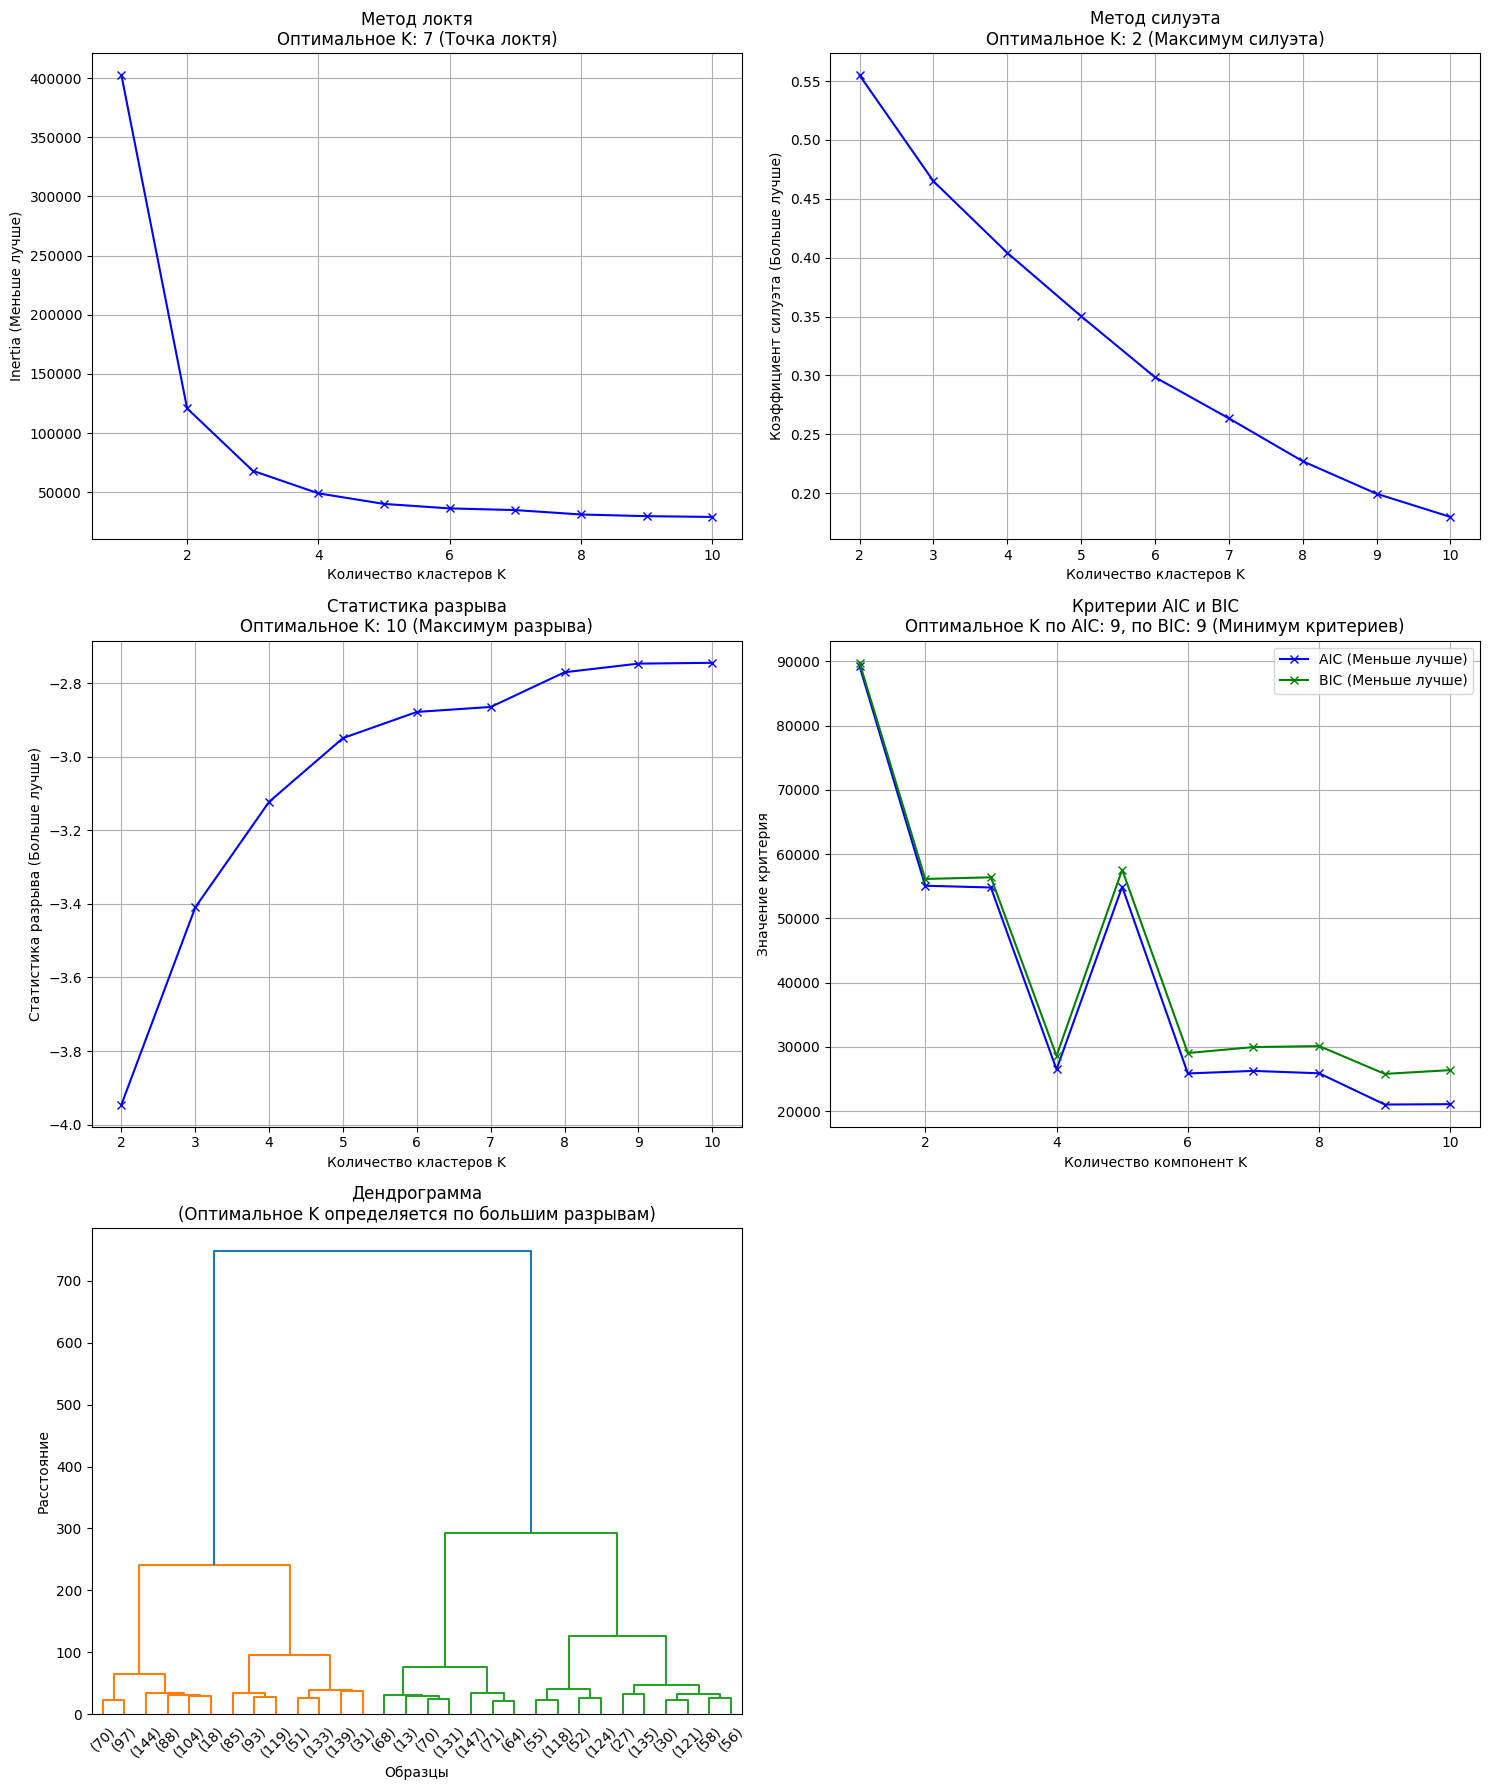

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

# Стандартизация данных
X = processed_data

# Диапазон чисел кластеров для анализа
K = range(1, 11)

# 1. Метод локтя (Elbow Method)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Определение оптимального K по методу локтя
diff_inertia = np.diff(inertia)
diff_diff_inertia = np.diff(diff_inertia)
elbow_point = np.argmin(diff_diff_inertia) + 2  # +2 из-за порядка дифференцирования

# 2. Метод силуэта (Silhouette Method)
silhouette_scores = []
K_silhouette = range(2, 11)  # Силуэт не определяется для k=1
for k in K_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Определение оптимального K по методу силуэта
optimal_k_silhouette = K_silhouette[np.argmax(silhouette_scores)]

# 3. Статистика разрыва (Gap Statistic)
def compute_gap_statistic(X, nrefs=5, max_clusters=10):
    gaps = np.zeros(max_clusters - 1)
    results = np.zeros(max_clusters - 1)
    for k in range(1, max_clusters):
        km = KMeans(n_clusters=k+1, random_state=42)
        km.fit(X)
        disp = km.inertia_
        results[k - 1] = disp

        ref_disps = np.zeros(nrefs)
        for i in range(nrefs):
            random_reference = np.random.random_sample(size=X.shape)
            km_ref = KMeans(n_clusters=k+1, random_state=42)
            km_ref.fit(random_reference)
            ref_disp = km_ref.inertia_
            ref_disps[i] = ref_disp
        gap = np.log(np.mean(ref_disps)) - np.log(disp)
        gaps[k - 1] = gap
    return gaps

gaps = compute_gap_statistic(X, nrefs=5, max_clusters=10)
K_gap = range(2, 11)

# Определение оптимального K по статистике разрыва
optimal_k_gap = K_gap[np.argmax(gaps)]

# 4. Критерии AIC и BIC для моделей смеси гауссовых распределений
aic_scores = []
bic_scores = []
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))

# Определение оптимального K по AIC и BIC
optimal_k_aic = K[np.argmin(aic_scores)]
optimal_k_bic = K[np.argmin(bic_scores)]

# 5. Иерархическая кластеризация с дендрограммой
linked = linkage(X, 'ward')

# Построение графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# График 1: Метод локтя
axes[0, 0].plot(K, inertia, 'bx-')
axes[0, 0].set_xlabel('Количество кластеров K')
axes[0, 0].set_ylabel('Inertia (Меньше лучше)')
axes[0, 0].set_title(f'Метод локтя\nОптимальное K: {elbow_point} (Точка локтя)')
axes[0, 0].grid(True)

# График 2: Метод силуэта
axes[0, 1].plot(K_silhouette, silhouette_scores, 'bx-')
axes[0, 1].set_xlabel('Количество кластеров K')
axes[0, 1].set_ylabel('Коэффициент силуэта (Больше лучше)')
axes[0, 1].set_title(f'Метод силуэта\nОптимальное K: {optimal_k_silhouette} (Максимум силуэта)')
axes[0, 1].grid(True)

# График 3: Статистика разрыва
axes[1, 0].plot(K_gap, gaps, 'bx-')
axes[1, 0].set_xlabel('Количество кластеров K')
axes[1, 0].set_ylabel('Статистика разрыва (Больше лучше)')
axes[1, 0].set_title(f'Статистика разрыва\nОптимальное K: {optimal_k_gap} (Максимум разрыва)')
axes[1, 0].grid(True)

# График 4: Критерии AIC и BIC
axes[1, 1].plot(K, aic_scores, 'bx-', label='AIC (Меньше лучше)')
axes[1, 1].plot(K, bic_scores, 'gx-', label='BIC (Меньше лучше)')
axes[1, 1].set_xlabel('Количество компонент K')
axes[1, 1].set_ylabel('Значение критерия')
axes[1, 1].set_title(f'Критерии AIC и BIC\nОптимальное K по AIC: {optimal_k_aic}, по BIC: {optimal_k_bic} (Минимум критериев)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# График 5: Дендрограмма
dendrogram(linked, ax=axes[2, 0], truncate_mode='lastp', p=30)
axes[2, 0].set_title('Дендрограмма\n(Оптимальное K определяется по большим разрывам)')
axes[2, 0].set_xlabel('Образцы')
axes[2, 0].set_ylabel('Расстояние')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

##### Обучение

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA

kmeans_plus = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans_plus.fit_predict(X)
labels_plus = kmeans_plus.labels_

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

dbscan = DBSCAN(eps=1.5, min_samples=2)
y_dbscan = dbscan.fit_predict(X)

optics = OPTICS(min_samples=2, xi=0.3)#, min_cluster_size=0.3)
y_optics = optics.fit(X)
labels = optics.labels_

#### **Шаг 4: Оценка качества кластеризации**

**4.1. Внутренние метрики:**

- **Коэффициент силуэта:** Оцените, насколько хорошо объекты расположены внутри кластеров.
- **Индекс Дэвиса-Болдина:** Оцените уровень разделимости кластеров.
- **Индекс Калинского-Харабаза:** Оцените соотношение межкластерной дисперсии к внутрикластерной.

**4.2. Внешние метрики (если доступны истинные метки):**

- **Adjusted Rand Index (ARI):** Сравните полученные кластеры с известными категориями клиентов.
- **Normalized Mutual Information (NMI):** Измерьте общую информацию между распределениями.

**4.3. Сравнение алгоритмов:**

- Составьте таблицу со значениями метрик для каждого алгоритма.
- Определите, какой алгоритм показал наилучшие результаты и почему.

In [ ]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import (
    adjusted_rand_score,
    v_measure_score,
    normalized_mutual_info_score,
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

clustering_algorithms = {}

clustering_algorithms['KMeans Plus'] = kmeans_plus
clustering_algorithms['AgglomerativeClustering'] = hc
clustering_algorithms['DBSCAN'] = dbscan
clustering_algorithms['OPTICS'] = optics

# Функция для вычисления индекса Дунна
def dunn_index(X, labels):
    labels = np.array(labels)
    mask = labels != -1  # исключаем шумовые точки
    X = X[mask]
    labels = labels[mask]

    unique_cluster_labels = np.unique(labels)
    if len(unique_cluster_labels) < 2:
        return np.nan

    clusters = [X[labels == label] for label in unique_cluster_labels]

    # Вычисляем минимальное межкластерное расстояние
    min_intercluster = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = cdist(clusters[i], clusters[j], metric='euclidean')
            if np.min(dist) < min_intercluster:
                min_intercluster = np.min(dist)

    # Вычисляем максимальное внутрикластерное расстояние
    max_intracluster = 0
    for cluster in clusters:
        if len(cluster) > 1:
            dist = pdist(cluster, metric='euclidean')
            if np.max(dist) > max_intracluster:
                max_intracluster = np.max(dist)

    if max_intracluster == 0:
        return np.nan
    else:
        return min_intercluster / max_intracluster

# Функции для вычисления метрик
def compute_internal_metrics(X, labels):
    mask = labels != -1  # исключаем шумовые точки
    X_masked = X[mask]
    labels_masked = labels[mask]

    n_clusters = len(np.unique(labels_masked))
    if n_clusters > 1 and len(X_masked) > 1:
        silhouette = silhouette_score(X_masked, labels_masked)
        calinski_harabasz = calinski_harabasz_score(X_masked, labels_masked)
        davies_bouldin = davies_bouldin_score(X_masked, labels_masked)
        dunn = dunn_index(X_masked, labels_masked)
    else:
        silhouette = np.nan
        calinski_harabasz = np.nan
        davies_bouldin = np.nan
        dunn = np.nan

    return {
        'Коэффициент силуэта': silhouette,
        'Индекс Дэвиса-Болдина': davies_bouldin,
        'Индекс Калинского-Харабаза': calinski_harabasz,
        'Индекс Дунна': dunn
    }

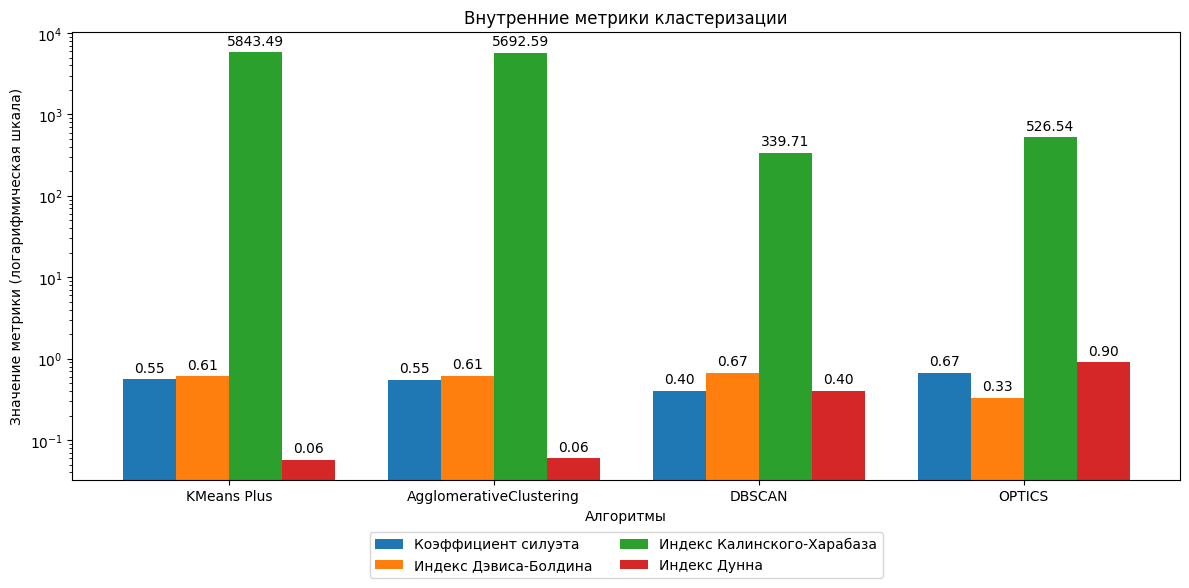

In [ ]:
metrics_results = {}

metrics_results['KMeans Plus'] = {}
metrics_results['KMeans Plus']['Внутренние'] = compute_internal_metrics(X, labels_plus)

metrics_results['AgglomerativeClustering'] = {}
metrics_results['AgglomerativeClustering']['Внутренние'] = compute_internal_metrics(X, y_hc)

metrics_results['DBSCAN'] = {}
metrics_results['DBSCAN']['Внутренние'] = compute_internal_metrics(X, y_dbscan)

metrics_results['OPTICS'] = {}
metrics_results['OPTICS']['Внутренние'] = compute_internal_metrics(X, labels)

internal_metrics = ['Коэффициент силуэта', 'Индекс Дэвиса-Болдина', 'Индекс Калинского-Харабаза', 'Индекс Дунна']
algorithms = ['KMeans Plus', 'AgglomerativeClustering', 'DBSCAN', 'OPTICS']

# Подготовка данных для графиков
def collect_metrics(metrics_dict, metric_names, metric_type):
    data = {}
    for metric in metric_names:
        values = []
        for algo in algorithms:
            value = metrics_dict[algo][metric_type].get(metric)
            values.append(value)
        data[metric] = values
    return data

internal_data = collect_metrics(metrics_results, internal_metrics, 'Внутренние')

# Функция для построения графиков
def plot_metrics(data, title, is_internal=False):
    x = np.arange(len(algorithms))
    total_width = 0.8  # Общая ширина всех столбцов для одного алгоритма
    num_metrics = len(data)
    width = total_width / num_metrics  # Ширина одного столбца
    offsets = np.linspace(-total_width/2 + width/2, total_width/2 - width/2, num_metrics)

    fig, ax = plt.subplots(figsize=(12, 6))

    for idx, (attribute, measurement) in enumerate(data.items()):
        rects = ax.bar(x + offsets[idx], measurement, width, label=attribute)

        # Добавление меток над столбцами
        for rect in rects:
            height = rect.get_height()
            if not np.isnan(height):
                ax.annotate(f'{height:.2f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')

    ax.set_xlabel('Алгоритмы')
    ax.set_ylabel('Значение метрики')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    # Если это внутренние метрики, используем логарифмический масштаб по оси Y
    if is_internal:
        ax.set_yscale('log')
        ax.set_ylabel('Значение метрики (логарифмическая шкала)')

    plt.tight_layout()
    plt.show()

plot_metrics(internal_data, 'Внутренние метрики кластеризации', is_internal=True)

#### **Шаг 5: Интерпретация и визуализация результатов**

**5.1. Визуализация кластеров:**

- **Снижение размерности:** Примените PCA или t-SNE для отображения данных в 2D или 3D пространстве.
- **Постройте графики:**
  - Рассеивания с цветовой кодировкой кластеров.
  - Дендрограммы для иерархической кластеризации.
- **Визуализация признаков:**
  - Постройте боксплоты, гистограммы или тепловые карты для сравнения признаков между кластерами.

**5.2. Описание сегментов:**

- Для каждого кластера опишите характерные черты:
  - Средние значения признаков.
  - Поведенческие особенности (например, частота покупок, средний чек).
  - Демографические характеристики (если доступны).
- Присвойте сегментам осмысленные названия (например, "Лояльные клиенты", "Покупатели со сниженной активностью", "Большие транзакции").

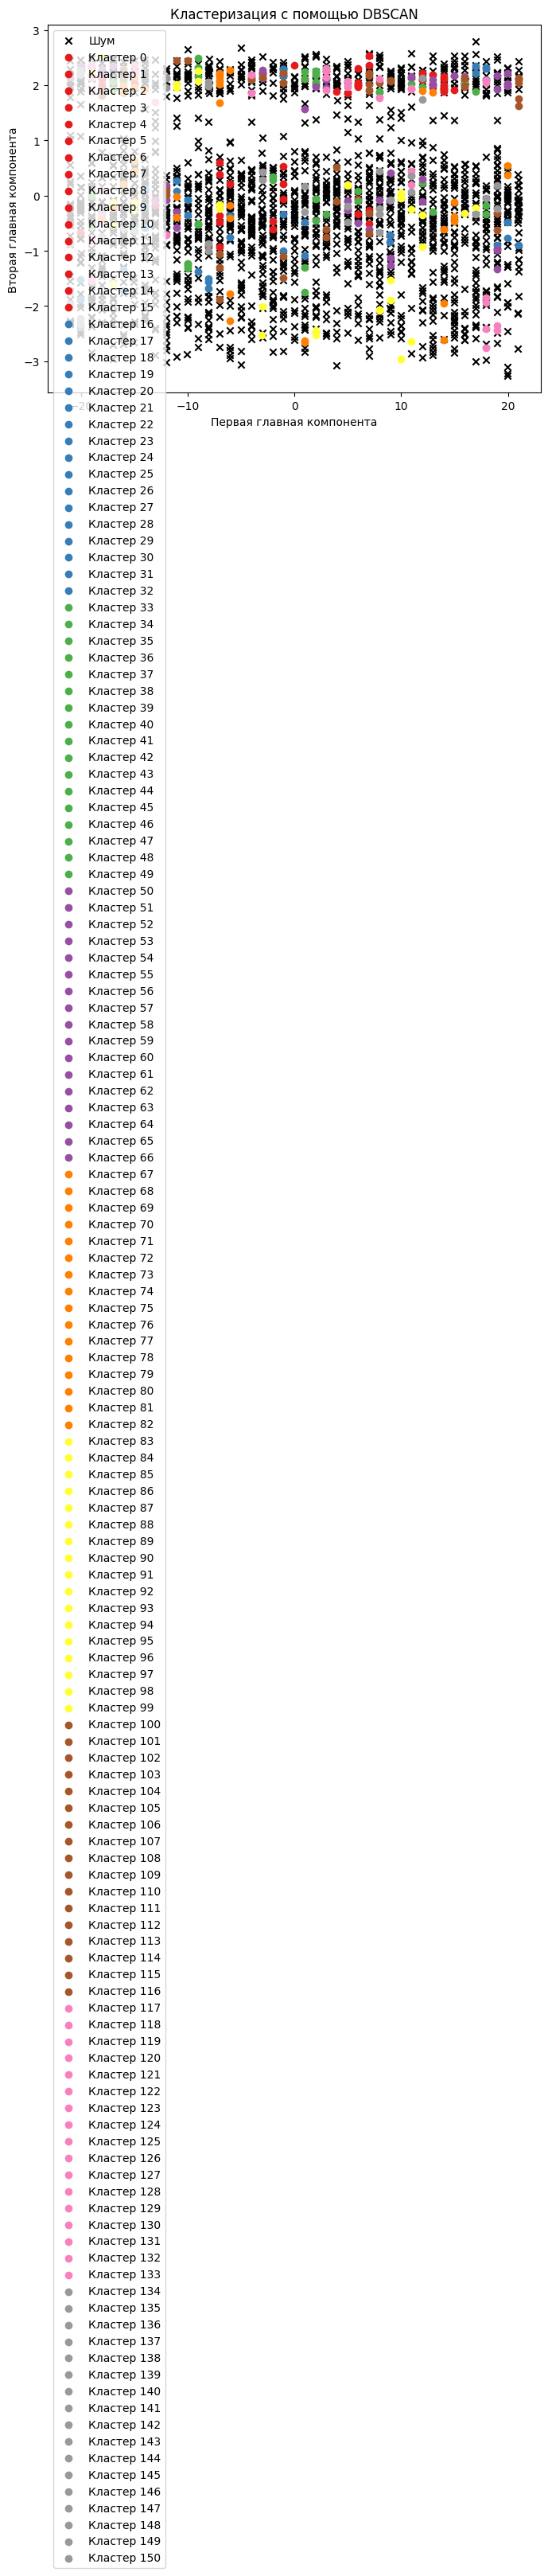

In [ ]:
from sklearn.decomposition import PCA

# Снижение размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DBSCAN
plt.figure(figsize=(8, 6))
unique_labels = np.unique(y_dbscan)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
for color, label in zip(colors, unique_labels):
    if label == -1:
        # Шумовые точки
        color = 'k'
        marker = 'x'
        label_text = 'Шум'
    else:
        marker = 'o'
        label_text = f'Кластер {label}'
    plt.scatter(X_pca[y_dbscan == label, 0],
                X_pca[y_dbscan == label, 1],
                c=[color],
                marker=marker,
                label=label_text)
plt.title('Кластеризация с помощью DBSCAN')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


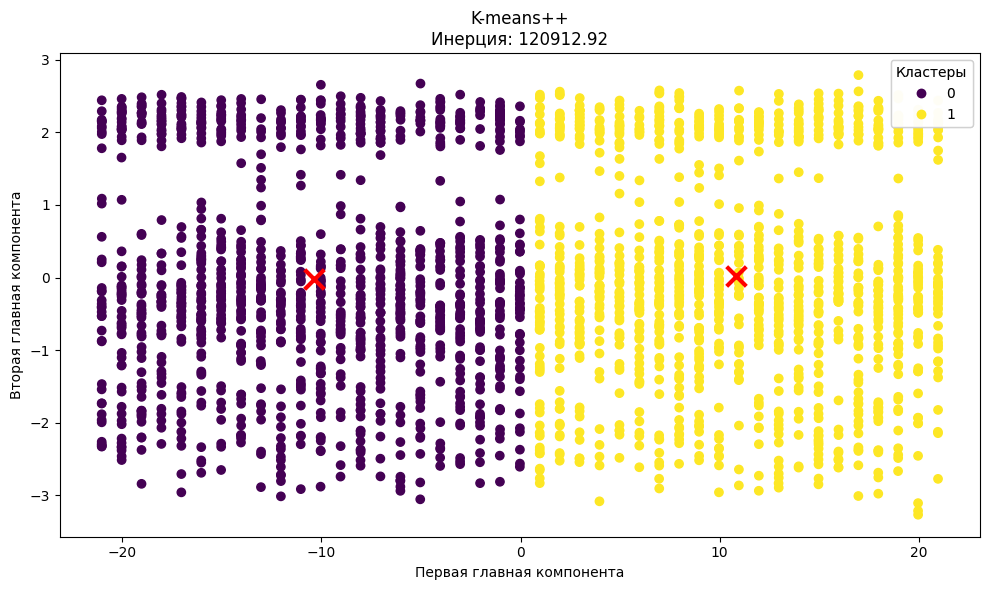

In [ ]:
# K-means++
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_plus, cmap='viridis')
ax.scatter(pca.transform(kmeans_plus.cluster_centers_)[:, 0],
           pca.transform(kmeans_plus.cluster_centers_)[:, 1],
           marker='x', s=200, linewidths=3, color='r', label='Центроиды')
ax.set_title('K-means++\nИнерция: {:.2f}'.format(kmeans_plus.inertia_))
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')
ax.legend()

legend = ax.legend(*scatter.legend_elements(), title="Кластеры", loc="upper right")
ax.add_artist(legend)

plt.tight_layout()
plt.show()

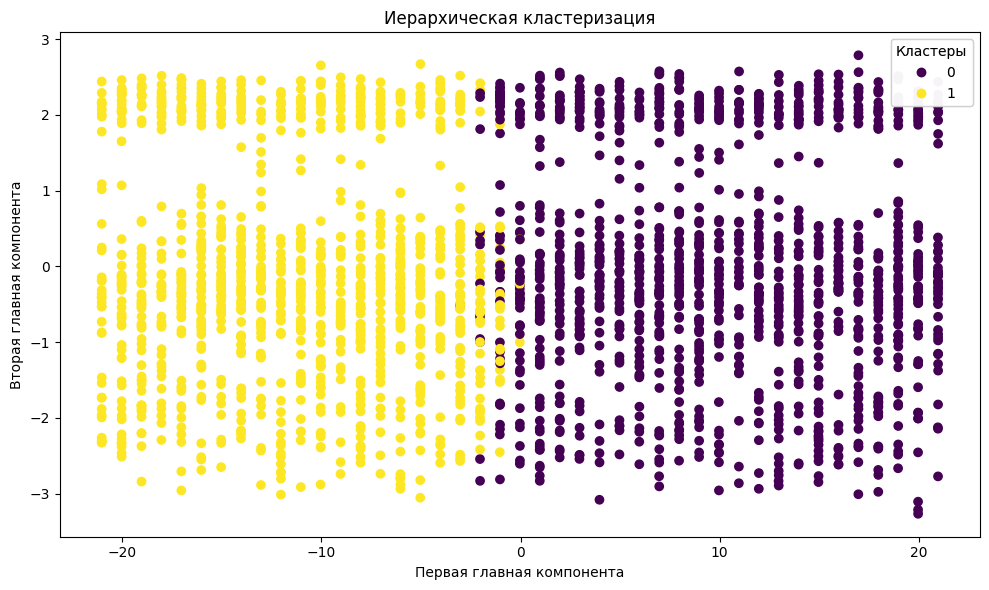

In [ ]:
# Иерархия

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap='viridis')
ax.set_title('Иерархическая кластеризация')
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')

legend = ax.legend(*scatter.legend_elements(), title="Кластеры", loc="upper right")
ax.add_artist(legend)

plt.tight_layout()
plt.show()

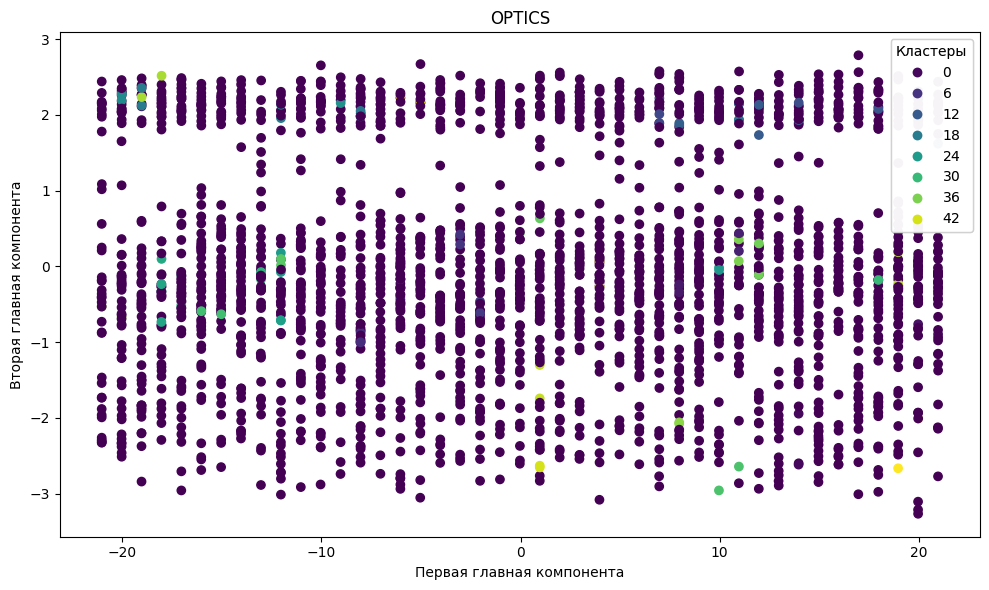

In [ ]:
# OPTICS

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
ax.set_title('OPTICS')
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')

legend = ax.legend(*scatter.legend_elements(), title="Кластеры", loc="upper right")
ax.add_artist(legend)

plt.tight_layout()
plt.show()

In [ ]:
X_df = pd.DataFrame(X)
X_df['KMeans_Cluster'] = y_kmeans

# Обратное преобразование числовых признаков
X_df[num_cols] = scaler.inverse_transform(num_scaled)

# Обратное кодирование категориальных признаков
X_df[category_cols] = encoder.inverse_transform(category_encoded)

for cluster in range(2):
    cluster_data = X_df[X_df['KMeans_Cluster'] == cluster].head(200)
    print(f"KMeans Cluster {cluster}:")
    # print(cluster_data)
    print("\n")

    # Вывод количества повторений уникальных значений для каждого столбца
    for col in X_df.columns:
        if col != 'KMeans_Cluster':
            print(f"Unique values in {col}:")
            print(cluster_data[col].value_counts())
            print("\n")

KMeans Cluster 0:


Unique values in TransactionAmount:
TransactionAmount
626.90    2
5.77      2
485.54    2
376.24    1
237.99    1
         ..
317.87    1
214.54    1
208.04    1
381.33    1
79.35     1
Name: count, Length: 197, dtype: int64


Unique values in TransactionDuration:
TransactionDuration
55.0     6
141.0    3
106.0    3
121.0    3
164.0    3
        ..
21.0     1
246.0    1
254.0    1
273.0    1
70.0     1
Name: count, Length: 146, dtype: int64


Unique values in LoginAttempts:
LoginAttempts
1.0    193
3.0      2
2.0      2
4.0      2
5.0      1
Name: count, dtype: int64


Unique values in AccountBalance:
AccountBalance
13758.91    1
1092.92     1
1540.87     1
6820.23     1
13475.14    1
           ..
145.50      1
11151.53    1
9344.98     1
1117.97     1
1692.15     1
Name: count, Length: 200, dtype: int64


Unique values in CustomerAge:
CustomerAge
53.0    9
69.0    8
22.0    8
23.0    7
51.0    7
46.0    6
27.0    6
26.0    6
39.0    5
20.0    5
19.0    5
38.0    5

In [ ]:
# Вывод данных для второго кластера
cluster_number = 1  # Индекс второго кластера (индексация начинается с 0)
cluster_data = X_df[X_df['KMeans_Cluster'] == cluster_number]

# Вывод первых 200 строк столбца CustomerAge из второго кластера
customer_age_cluster = cluster_data['CustomerAge'].head(200)

# Получение уникальных значений и их количества
unique_values = customer_age_cluster.value_counts()

# Вывод уникальных значений и их количества
print(f"CustomerAge в KMeans Cluster {cluster_number}:")
for age, count in unique_values.items():
    print(f"Возраст {age}: {count} раз")

CustomerAge в KMeans Cluster 1:
Возраст 26.0: 14 раз
Возраст 58.0: 10 раз
Возраст 37.0: 9 раз
Возраст 27.0: 8 раз
Возраст 21.0: 8 раз
Возраст 25.0: 7 раз
Возраст 59.0: 6 раз
Возраст 19.0: 6 раз
Возраст 56.0: 6 раз
Возраст 62.0: 5 раз
Возраст 42.0: 5 раз
Возраст 63.0: 5 раз
Возраст 41.0: 5 раз
Возраст 61.0: 4 раз
Возраст 18.0: 4 раз
Возраст 54.0: 4 раз
Возраст 48.0: 3 раз
Возраст 64.0: 3 раз
Возраст 70.0: 3 раз
Возраст 57.0: 3 раз
Возраст 71.0: 3 раз
Возраст 40.0: 3 раз
Возраст 22.0: 3 раз
Возраст 53.0: 3 раз
Возраст 34.0: 3 раз
Возраст 60.0: 3 раз
Возраст 28.0: 3 раз
Возраст 75.0: 3 раз
Возраст 49.0: 3 раз
Возраст 55.0: 3 раз
Возраст 66.0: 3 раз
Возраст 50.0: 2 раз
Возраст 39.0: 2 раз
Возраст 68.0: 2 раз
Возраст 79.0: 2 раз
Возраст 65.0: 2 раз
Возраст 32.0: 2 раз
Возраст 44.0: 2 раз
Возраст 24.0: 2 раз
Возраст 46.0: 2 раз
Возраст 72.0: 2 раз
Возраст 73.0: 2 раз
Возраст 36.0: 2 раз
Возраст 45.0: 2 раз
Возраст 20.0: 2 раз
Возраст 67.0: 2 раз
Возраст 51.0: 2 раз
Возраст 78.0: 2 раз
Возрас

In [ ]:
# Добавьте метки кластеров к вашим данным
X_df = pd.DataFrame(X)
X_df['OPTICS_Cluster'] = labels

# Обратное преобразование числовых признаков
X_df[num_cols] = scaler.inverse_transform(num_scaled)

# Обратное кодирование категориальных признаков
X_df[category_cols] = encoder.inverse_transform(category_encoded)

# Вывод 3 экземпляров каждого кластера
for cluster in range(50):
    cluster_data = X_df[X_df['OPTICS_Cluster'] == cluster].head(15)
    print(f"KMeans Cluster {cluster}:")
    print(cluster_data)
    print("\n")

KMeans Cluster 0:
     TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
704             321.86                167.0            1.0        12626.49   
760             319.27                150.0            1.0        10269.78   

     CustomerAge     Recency  Frequency  Monetary TransactionType  \
704         63.0 -40491644.0        6.0   1499.41           Debit   
760         50.0 -39280640.0        7.0   1519.86           Debit   

        Location Channel CustomerOccupation  OPTICS_Cluster  
704  San Antonio     ATM             Doctor               0  
760  San Antonio     ATM             Doctor               0  


KMeans Cluster 1:
     TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
752             142.58                145.0            1.0         7844.23   
864             261.14                162.0            1.0         6100.08   

     CustomerAge     Recency  Frequency  Monetary TransactionType  \
752         33.0 -43515955.0 

#### **Шаг 6: Формирование бизнес-рекомендаций**

**6.1. Анализ потребностей каждого сегмента:**

- Определите потребности и предпочтения клиентов в каждом сегменте.
- Выявите возможности для увеличения продаж и улучшения сервиса.

**6.2. Разработка стратегий для каждого сегмента:**

- **Маркетинговые кампании:**
  - Персонализированные предложения.
  - Программы лояльности для удержания ценных клиентов.
- **Оптимизация продуктов:**
  - Расширение ассортимента для популярных сегментов.
  - Фокус на продуктах, интересных конкретным сегментам.

**6.3. Оценка потенциального влияния:**

- Оцените, как предложенные стратегии могут повысить выручку, удовлетворенность клиентов и другие ключевые показатели.

# <font color='red'>ВАШ ОТВЕТ</font>

#### **Шаг 7: Документирование и презентация результатов**

**7.1. Подготовка отчета:**

- **Введение:**
  - Описание цели работы и её значимости для бизнеса.
- **Методология:**
  - Подробное описание проведенных шагов.
- **Результаты:**
  - Представление метрик оценки и визуализаций.
  - Описание сегментов клиентов.
- **Обсуждение:**
  - Анализ полученных результатов.
  - Сравнение алгоритмов и обоснование выбора.
- **Рекомендации:**
  - Предложения по внедрению результатов в бизнес-процессы.
- **Заключение:**
  - Выводы о проделанной работе и её значимости.

**7.2. Презентация:**

- Подготовьте слайды для представления ключевых моментов работы.
- Используйте визуализации для иллюстрации результатов.
- Готовьтесь ответить на вопросы аудитории.

**7.3. Код и reproducibility:**

- Организуйте код в репозитории (например, GitHub) с понятной структурой.
- Приложите инструкции для воспроизведения результатов.

